# Neural Network over Iris Dataset

## Import Libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets

# Load the Iris Data Set

In [2]:
iris = datasets.load_iris()
X = iris.data
y = np.atleast_2d(iris.target).T




# Define Parameters

In [3]:
# Learning Rate
eta = 0.015

# Number of epochs for learning
epochs = 1000

# Number of Hidden Neurons
hidden = 10

# Drop out rate probability (drp = 1 means no dropout)
drp = 1

# Define Functions

In [4]:
def sigmoid(x, derivative=False):
    if derivative:
        return x * (1 - x)
    return 1 / (1 + np.exp(-x))

In [5]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

def feedforward(X):
    z_h = np.dot(X, w01)
    a_h = sigmoid(z_h)

    z_o = np.dot(a_h, w12)
    a_o = sigmoid(z_o)
    return(a_o,a_h)

In [6]:
def feedforward(X,mode,k=drp):
    # When training (mode="0") Drop out applies for the hidden layer outputs a_h
    if mode == 0:
        #print("Testing mode activated")
        z_h = np.dot(X, w01)
        a_h = sigmoid(z_h)
        #print("a_h before drop out:", a_h)
        r = np.random.binomial(size=a_h.shape,n=1,p=k)
        a_h *= r
        #print("a_h AFTER drop out, a_h:", a_h)
        #print("\n")
        z_o = np.dot(a_h, w12)
        a_o = sigmoid(z_o)
    
    # When Testing (mode = "1") we use the normal weights w12 (not scaled with p)
    elif mode == 1:
        #print("Training mode activated")
        z_h = np.dot(X, w01)
        a_h = sigmoid(z_h)
        z_o = np.dot(a_h, w12)
        a_o = sigmoid(z_o)
    else:
        print("Must specify 2nd argument '0' for Training or '1' for Test")
        
    return(a_o,a_h)

# Initialize the weights

In [7]:
w01 = np.random.random((len(X[0]), hidden))
w12 = np.random.random((hidden, 1))

# Start feeding forward and backpropagate *epochs* times.

In [8]:
error_total=[]
error_total0=[]
error_total1=[]
error_total2=[]

for epoch in range(epochs):
    a_o, a_h = feedforward(X,0,drp)
     # Calculate the error
    a_o_error = ((1 / 2) * (np.power((a_o - y), 2)))

    
   
    a_o_err_y = np.concatenate((a_o_error,y), axis=1)
    a_o_err_y0 = a_o_err_y[a_o_err_y[:,1]==0][:,0]
    a_o_err_y1 = a_o_err_y[a_o_err_y[:,1]==1][:,0]
    a_o_err_y2 = a_o_err_y[a_o_err_y[:,1]==2][:,0]
    
    error_total = np.append(error_total,sum(a_o_error))
    error_total0 = np.append(error_total0,sum(a_o_err_y0))
    error_total1 = np.append(error_total1,sum(a_o_err_y1))
    error_total2 = np.append(error_total2,sum(a_o_err_y2))

    #print(sum(a_o_error))

    # Backpropagation
    ## Output to Hidden Layer weights
    delta_a_o_error = a_o - y
    delta_z_o = sigmoid(a_o,derivative=True)
    delta_w12 = a_h
    delta_output_layer = np.dot(delta_w12.T,(delta_a_o_error * delta_z_o))

    ## Hidden to Input Layer weights
    delta_a_h = np.dot(delta_a_o_error * delta_z_o, w12.T)
    delta_z_h = sigmoid(a_h,derivative=True)
    delta_w01 = X
    delta_hidden_layer = np.dot(delta_w01.T, delta_a_h * delta_z_h)

    # Adjust weights
    w01 = w01 - eta * delta_hidden_layer
    w12 = w12 - eta * delta_output_layer

# Show final total error, type contribution to error

In [9]:
print("Total error:",sum(a_o_error))
print("Type 0 error:",sum(a_o_err_y0))
print("Type 1 error:",sum(a_o_err_y1))
print("Type 2 error:",sum(a_o_err_y2))

Total error: [25.10066008]
Type 0 error: 0.03681353885244181
Type 1 error: 0.0012628201343054027
Type 2 error: 25.062583723014725


# Plot error after each epoch

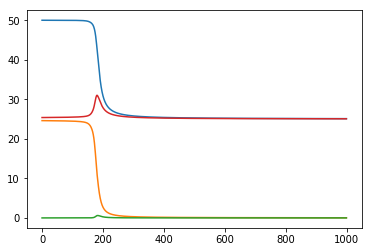

In [10]:
plt.plot(error_total)
plt.plot(error_total0)
plt.plot(error_total1)
plt.plot(error_total2)

# Show independent, dependent, predicted values

In [11]:
a_o, a_h = feedforward(X,1)
print(np.concatenate((X,y,a_o),axis=1))

[[5.1        3.5        1.4        0.2        0.         0.0357081 ]
 [4.9        3.         1.4        0.2        0.         0.03875962]
 [4.7        3.2        1.3        0.2        0.         0.03781777]
 [4.6        3.1        1.5        0.2        0.         0.04204257]
 [5.         3.6        1.4        0.2        0.         0.03575886]
 [5.4        3.9        1.7        0.4        0.         0.03666225]
 [4.6        3.4        1.4        0.3        0.         0.0395541 ]
 [5.         3.4        1.5        0.2        0.         0.03726793]
 [4.4        2.9        1.4        0.2        0.         0.04406972]
 [4.9        3.1        1.5        0.1        0.         0.03840025]
 [5.4        3.7        1.5        0.2        0.         0.03481911]
 [4.8        3.4        1.6        0.2        0.         0.03970362]
 [4.8        3.         1.4        0.1        0.         0.03841678]
 [4.3        3.         1.1        0.1        0.         0.03822436]
 [5.8        4.         1.2       